# Nepali Sign Language Recognition

## 1. Import required libraries 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import numpy as np
import random

In [3]:
# Add path for helper_functions
import sys
sys.path.append("C:\\Nepali-Sign-Language-Recognition")
from helper_functions import show_images, plot_curves

In [4]:
# Set Devanagari font
plt.rcParams["font.family"] = "Nirmala UI"

In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Data exploration 

In [6]:
data_dir = pathlib.Path("C:\\Nepali-Sign-Language-Recognition\\Nepali Sign Language Images\\train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['क' 'क्ष' 'ख' 'ग' 'घ' 'ङ' 'च' 'छ' 'ज' 'ज्ञ' 'झ' 'ञ' 'ट' 'ठ' 'ड' 'ढ' 'ण'
 'त' 'त्र' 'थ' 'द' 'ध' 'न' 'प' 'फ' 'ब' 'भ' 'म' 'य' 'र' 'ल' 'व' 'श' 'ष' 'स'
 'ह' '०' '१' '२' '३' '४' '५' '६' '७' '८' '९']


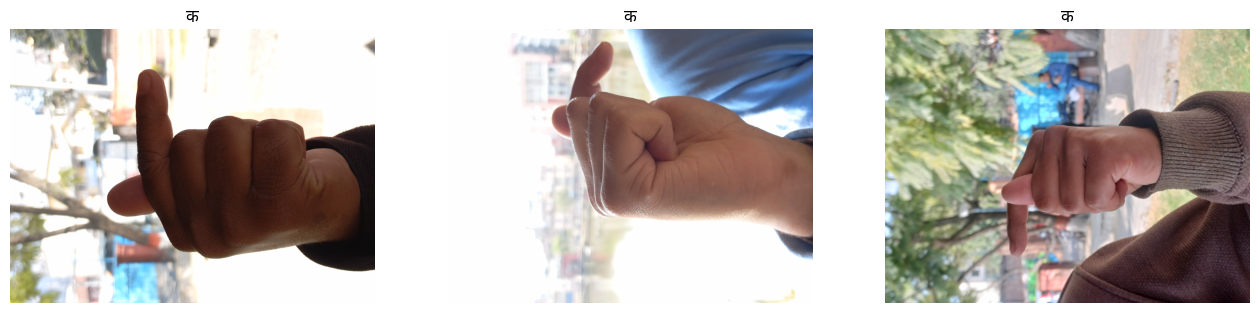

In [7]:
target_directory = "C:\\Nepali-Sign-Language-Recognition\\Nepali Sign Language Images\\train"
class_name = "क"
show_images(target_directory, class_name)

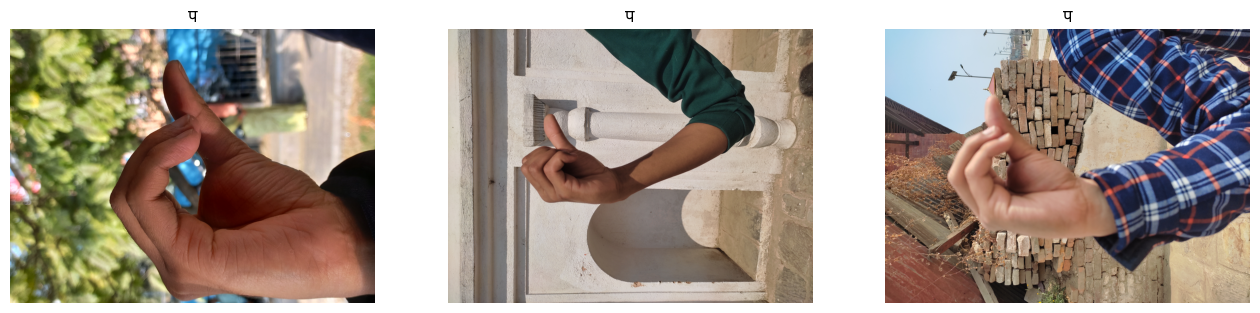

In [11]:
target_directory = "C:\\Nepali-Sign-Language-Recognition\\Nepali Sign Language Images\\train"
class_name = "प"
show_images(target_directory, class_name)

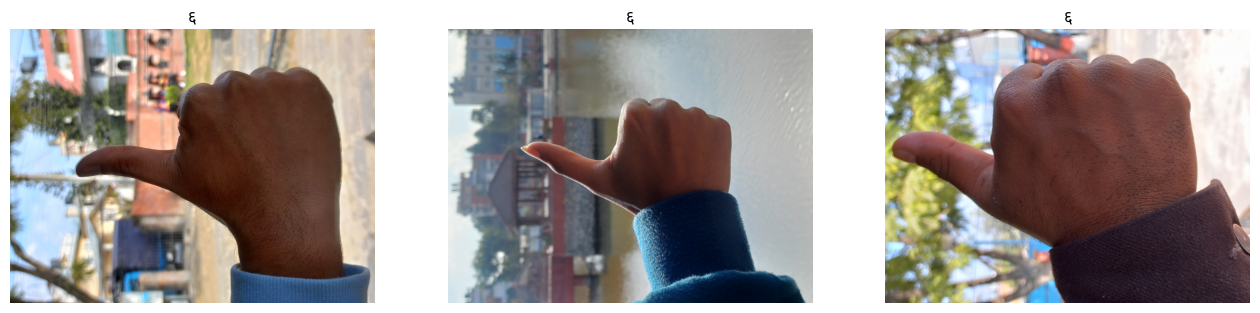

In [16]:
target_directory = "C:\\Nepali-Sign-Language-Recognition\\Nepali Sign Language Images\\train"
class_name = "६"
show_images(target_directory, class_name)

## 3. Data Preprocessing 

In [12]:
# Define path to train, test and validation set
train_dir = "C:\\Nepali-Sign-Language-Recognition\\Nepali Sign Language Images\\train"
val_dir = "C:\\Nepali-Sign-Language-Recognition\\Nepali Sign Language Images\\validation"
test_dir = "C:\\Nepali-Sign-Language-Recognition\\Nepali Sign Language Images\\test"

In [16]:
# Create train, test and validation data generators and apply image augmentation to training data
train_datagen_1 = ImageDataGenerator(rescale=1/255., 
                                   rotation_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.3, 
                                   horizontal_flip=True, 
                                   vertical_flip=True
                                  )

valid_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [18]:
# Load data from directories and turn it into batches
train_data_aug_1 = train_datagen_1.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="categorical"
                                              )

valid_data = valid_datagen.flow_from_directory(directory=val_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="categorical"
                                              )

test_data = test_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="categorical"
                                              )

Found 1664 images belonging to 46 classes.
Found 357 images belonging to 46 classes.
Found 384 images belonging to 46 classes.


(-0.5, 223.5, 223.5, -0.5)

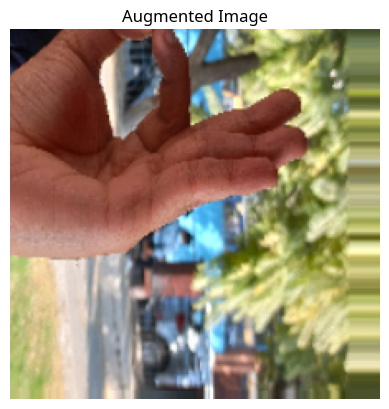

In [24]:
# Get a random sample of augmented image from data batch
images, labels = train_data_aug_1.next()
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title("Augmented Image")
plt.axis(False)

## 4. Create a CNN model

In [26]:
# Build a CNN model
sign_recognition_1 = Sequential([
    Conv2D(filters=10, 
           kernel_size=3, 
           strides=1, 
           padding="valid", 
           activation="relu", 
           input_shape=(224, 224, 3)
          ),
    MaxPool2D(pool_size=2),
    Dropout(0.1),
    Conv2D(10, 3),
    Activation(tf.nn.relu),
    MaxPool2D(),
    Flatten(),
    Dense(46),
    Activation("softmax")
])

# Compile the model
sign_recognition_1.compile(loss="categorical_crossentropy", 
                           optimizer=Adam(), 
                           metrics=["accuracy"]
                          )

# Get a summary of the model
sign_recognition_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 111, 111, 10)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 activation_2 (Activation)   (None, 109, 109, 10)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                 

## 5. Train the `sign_recognition_1` CNN model

In [27]:
sign_recognition_1_history = sign_recognition_1.fit(train_data_aug_1, 
                                                    epochs=15, 
                                                    steps_per_epoch=len(train_data_aug_1), 
                                                    validation_data=valid_data, 
                                                    validation_steps=len(valid_data)
                                                   )

Epoch 1/15


2023-12-20 23:15:52.563967: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-20 23:15:56.388524: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-20 23:15:57.632024: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-20 23:15:58.218077: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-20 23:15:58.585141: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa04c0327d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-20 23:15:58.585180: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RT

52/52 [==============================] - 96s 2s/step - loss: 3.9654 - accuracy: 0.0228 - val_loss: 3.8064 - val_accuracy: 0.0252
Epoch 2/15
52/52 [==============================] - 88s 2s/step - loss: 3.8015 - accuracy: 0.0240 - val_loss: 3.7743 - val_accuracy: 0.0336
Epoch 3/15
52/52 [==============================] - 89s 2s/step - loss: 3.7679 - accuracy: 0.0379 - val_loss: 3.7247 - val_accuracy: 0.0364
Epoch 4/15
52/52 [==============================] - 88s 2s/step - loss: 3.7358 - accuracy: 0.0397 - val_loss: 3.6949 - val_accuracy: 0.0448
Epoch 5/15
52/52 [==============================] - 90s 2s/step - loss: 3.7034 - accuracy: 0.0391 - val_loss: 3.6709 - val_accuracy: 0.0672
Epoch 6/15
52/52 [==============================] - 91s 2s/step - loss: 3.6582 - accuracy: 0.0559 - val_loss: 3.6338 - val_accuracy: 0.0812
Epoch 7/15
52/52 [==============================] - 87s 2s/step - loss: 3.6083 - accuracy: 0.0679 - val_loss: 3.6990 - val_accuracy: 0.0560
Epoch 8/15
52/52 [=============

## 6. Evaluate the `sign_recognition_1` Model

In [28]:
sign_recognition_1.evaluate(test_data)

12/12 [==============================] - 15s 1s/step - loss: 3.5645 - accuracy: 0.0833


[3.5645244121551514, 0.0833333358168602]

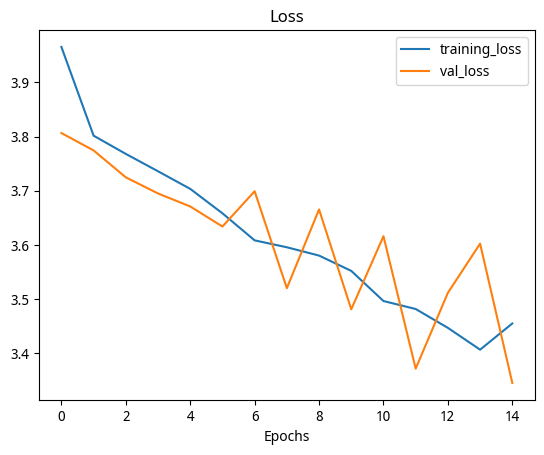

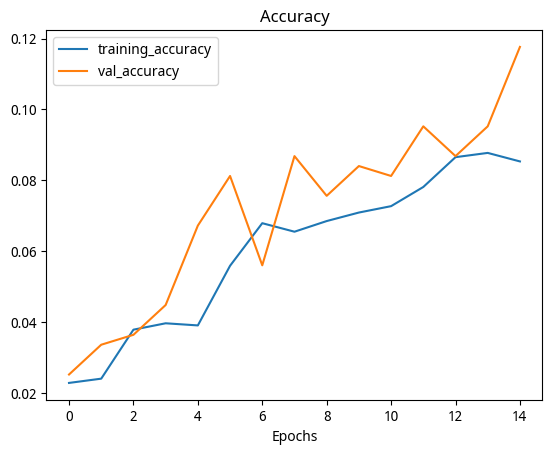

In [29]:
# Plot loss curves
plot_curves(sign_recognition_1_history)

## 7. Adjust data augmentation and Build a more complex CNN Model

### 7.1. Data Preprocessing

In [13]:
# Create train, test and validation data generators and apply image augmentation to training data
train_datagen_2 = ImageDataGenerator(rescale=1/255., 
                                   rotation_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   width_shift_range=0.2, 
                                   horizontal_flip=True
                                  )

valid_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [14]:
# St image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [15]:
# Load data from directories and turn it into batches
train_data_aug_2 = train_datagen_2.flow_from_directory(directory=train_dir, 
                                               batch_size=BATCH_SIZE, 
                                               target_size=IMG_SIZE, 
                                               class_mode="categorical"
                                              )

valid_data = valid_datagen.flow_from_directory(directory=val_dir, 
                                               batch_size=BATCH_SIZE, 
                                               target_size=IMG_SIZE, 
                                               class_mode="categorical"
                                              )

test_data = test_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=BATCH_SIZE, 
                                               target_size=IMG_SIZE, 
                                               class_mode="categorical"
                                              )

Found 1664 images belonging to 46 classes.
Found 357 images belonging to 46 classes.
Found 384 images belonging to 46 classes.


(-0.5, 223.5, 223.5, -0.5)

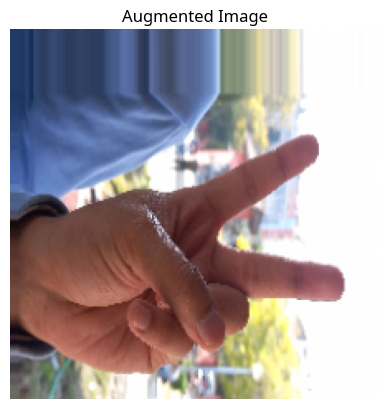

In [16]:
# Get a random sample of augmented image from data batch
images, labels = train_data_aug_2.next()
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title("Augmented Image")
plt.axis(False)

### 7.2. Build CNN with more layers 

In [19]:
# Build a CNN model
sign_recognition_2 = Sequential([
    Conv2D(filters=10, 
           kernel_size=3, 
           strides=1, 
           padding="valid", 
           activation="relu", 
           input_shape=(224, 224, 3)
          ),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(46, activation="softmax")
])

# Compile the model
sign_recognition_2.compile(loss="categorical_crossentropy", 
                           optimizer=Adam(), 
                           metrics=["accuracy"]
                          )

# Get a summary of the model
sign_recognition_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

### 7.3. Train the `sign_recognition_2` CNN model 

In [20]:
sign_recognition_2_history = sign_recognition_2.fit(train_data_aug_2, 
                                                    epochs=25, 
                                                    steps_per_epoch=len(train_data_aug_2), 
                                                    validation_data=valid_data, 
                                                    validation_steps=len(valid_data)
                                                   )

Epoch 1/25


2023-12-21 21:21:26.350643: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-21 21:21:27.648092: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-21 21:21:28.287913: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0f6003bdc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-21 21:21:28.287952: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2023-12-21 21:21:28.304092: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-21 21:21:28.410505: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
I0000 00:00:1703172988.466100     662 devic

52/52 [==============================] - 99s 2s/step - loss: 3.9401 - accuracy: 0.0355 - val_loss: 3.7151 - val_accuracy: 0.0672
Epoch 2/25
52/52 [==============================] - 89s 2s/step - loss: 3.6009 - accuracy: 0.0763 - val_loss: 3.2374 - val_accuracy: 0.1345
Epoch 3/25
52/52 [==============================] - 90s 2s/step - loss: 3.2597 - accuracy: 0.1286 - val_loss: 2.9467 - val_accuracy: 0.1821
Epoch 4/25
52/52 [==============================] - 93s 2s/step - loss: 3.0131 - accuracy: 0.1893 - val_loss: 2.8850 - val_accuracy: 0.2101
Epoch 5/25
52/52 [==============================] - 92s 2s/step - loss: 2.8528 - accuracy: 0.2422 - val_loss: 2.6198 - val_accuracy: 0.2913
Epoch 6/25
52/52 [==============================] - 92s 2s/step - loss: 2.6587 - accuracy: 0.2855 - val_loss: 2.5035 - val_accuracy: 0.2773
Epoch 7/25
52/52 [==============================] - 90s 2s/step - loss: 2.5727 - accuracy: 0.3113 - val_loss: 2.4141 - val_accuracy: 0.3333
Epoch 8/25
52/52 [=============

### 7.4. Evaluate the `sign_recognition_2` Model

In [21]:
sign_recognition_2.evaluate(test_data)

12/12 [==============================] - 16s 1s/step - loss: 1.8164 - accuracy: 0.5156


[1.8164161443710327, 0.515625]

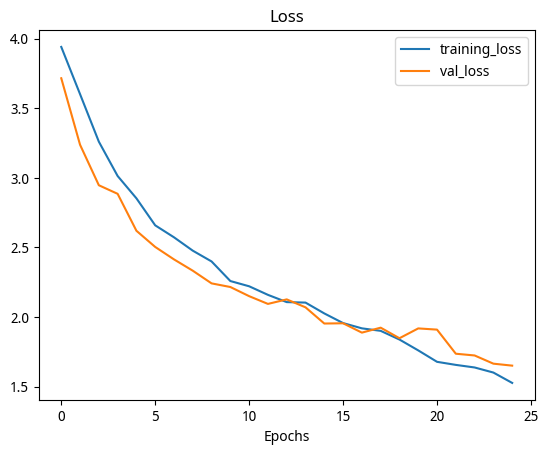

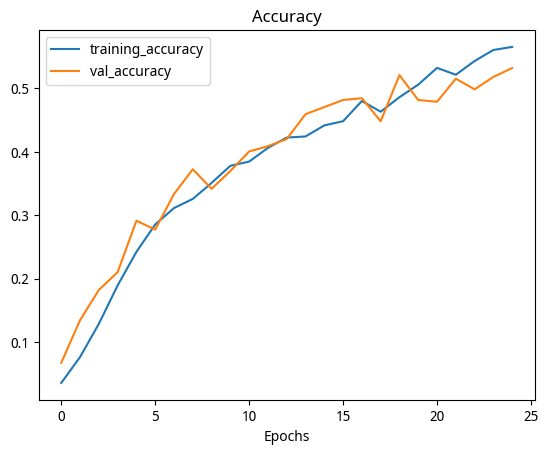

In [22]:
plot_curves(sign_recognition_2_history)